The bankchurn dataset consists information about:

In [ ]:
import pandas as pd
df=pd.read_csv('/content/bankchurn.zip')
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


DESCRIPTIVE STATISTICS

In [ ]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.isnull().sum() #no null values

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

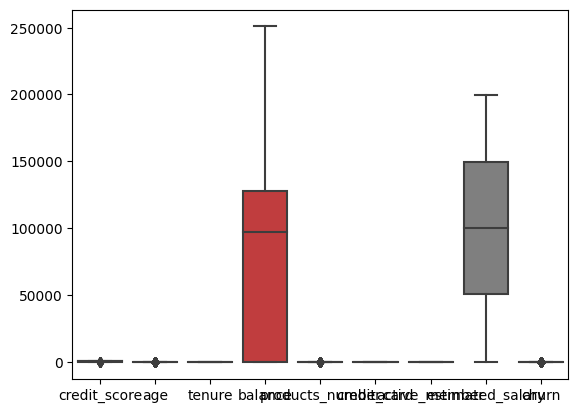

<Figure size 4000x2000 with 0 Axes>

In [ ]:
sns.boxplot(data=df)
plt.figure(figsize=(40,20))
plt.show()
#no outliers


<Axes: >

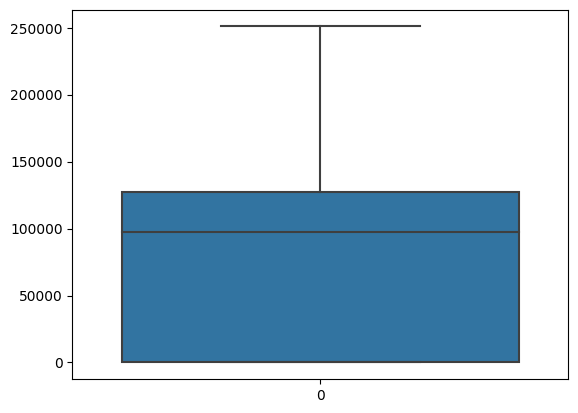

In [ ]:
sns.boxplot(data=df['balance'])

<Axes: >

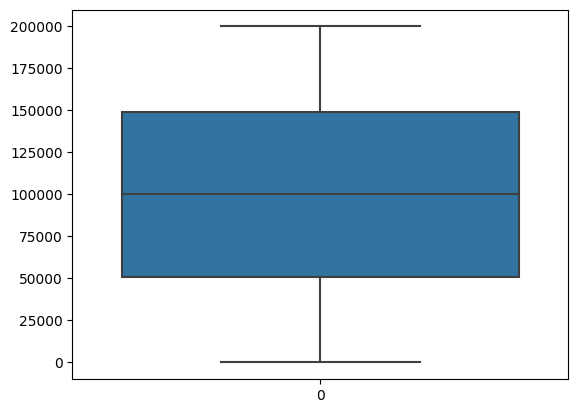

In [ ]:
sns.boxplot(data=df['estimated_salary'])

In [ ]:
df.drop('customer_id',axis=1,inplace=True)

In [ ]:
#Calculate the frequency of unique values in categorical columns (country, gender, credit_card, active_member, churn).
#

In [ ]:
df.columns

Index(['credit_score', 'country', 'gender', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary',
       'churn'],
      dtype='object')

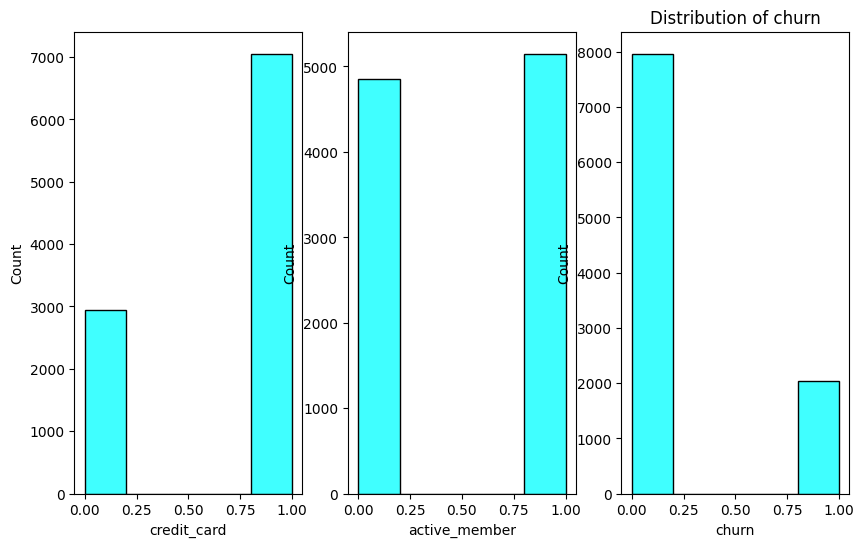

In [ ]:

import matplotlib.pyplot as plt


fig, axes = plt.subplots(ncols=3, figsize=(10,6))
for index,col in enumerate(['credit_card', 'active_member', 'churn'
       ]) :
    sns.histplot(data=df, x=col,color='cyan',edgecolor='black', bins=5,ax=axes[index])
    plt.title(f'Distribution of {col}')
plt.show()

<ipython-input-89-27f06c2fa271>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-89-27f06c2fa271>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

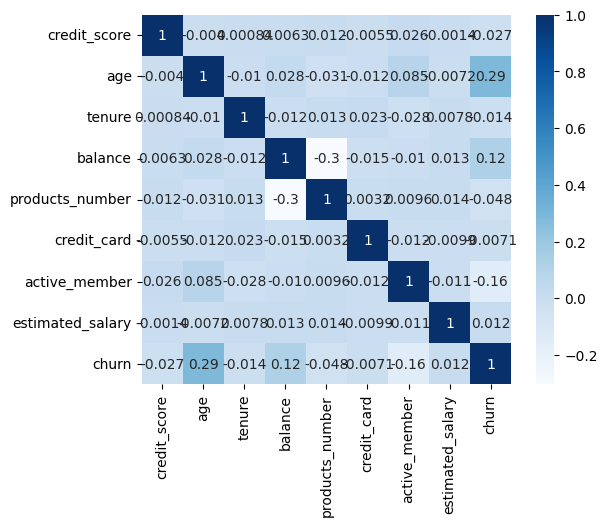

In [ ]:
df.corr()
sns.heatmap(df.corr(), annot=True,cmap='Blues', square=True)

In [ ]:
fig = px.histogram(df, x='age', color = 'churn', barmode = 'group')
fig
#number of customers churned out more in age group(37-52)

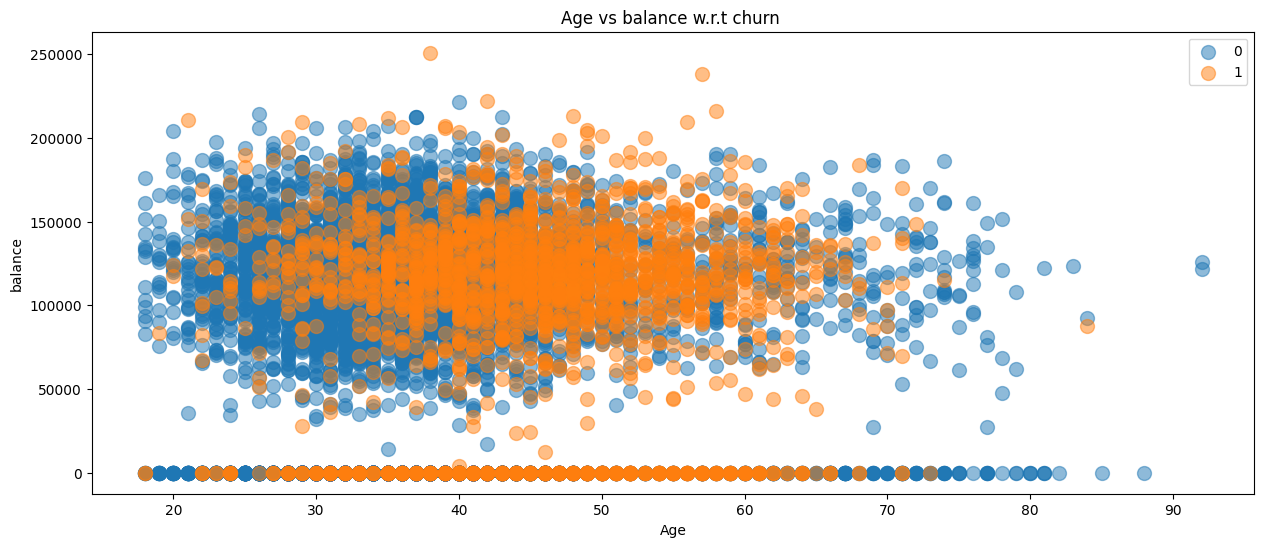

In [ ]:
plt.figure(1 , figsize = (15 , 6))
for churn in [0,1]:
    plt.scatter(x=df[df['churn'] == churn]['age'],
        y=df[df['churn'] == churn]['balance'],
         s = 100 , alpha = 0.5 , label = churn)
plt.xlabel('Age')
plt.ylabel('balance')
plt.title('Age vs balance w.r.t churn ')
plt.legend()
plt.show()
#customers with 0 balance and between 1lakh to 150000 in age group above 35 below 60 churned out more

In [ ]:
df['active_member'].value_counts()

1    5151
0    4849
Name: active_member, dtype: int64

Text(0.5, 1.0, 'active_member w.r.t churn')

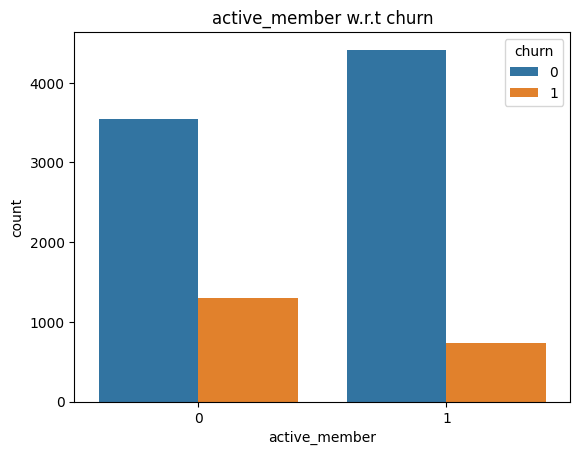

In [ ]:
sns.countplot(x='active_member', hue='churn', data=df)
plt.title('active_member w.r.t churn')#1-customers churned;0-customers retained
#whether active_member=1(yes) or not less significant difference w.r.t churn but leans more towards the active_member

Text(0.5, 1.0, 'Gender w.r.t credit_card')

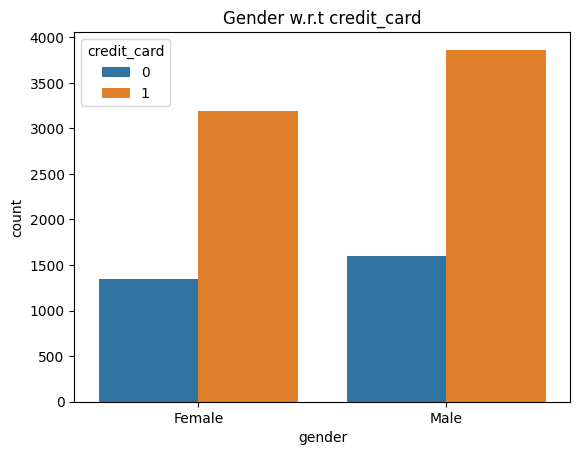

In [ ]:
sns.countplot(x='gender', hue='credit_card', data=df)
plt.title('Gender w.r.t credit_card')#more number of male customers possess credit_card

Text(0.5, 1.0, 'credit_card w.r.t churn')

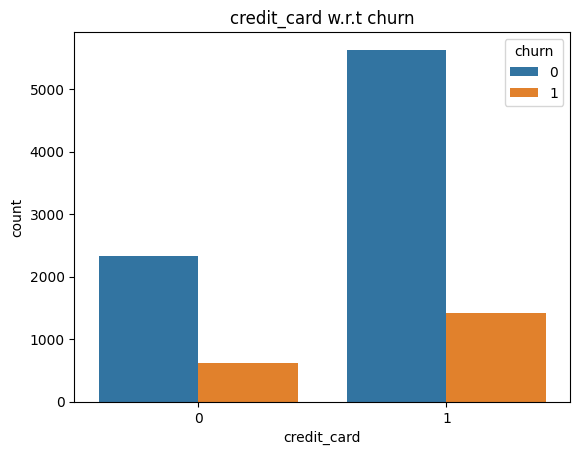

In [ ]:
sns.countplot(x='credit_card', hue='churn', data=df)
plt.title('credit_card w.r.t churn')
#more number of customers with credit_card retained

In [ ]:
fig = px.histogram(df, x='credit_score', color = 'churn', barmode = 'group')
fig
#customers with high credit_score retained mostly

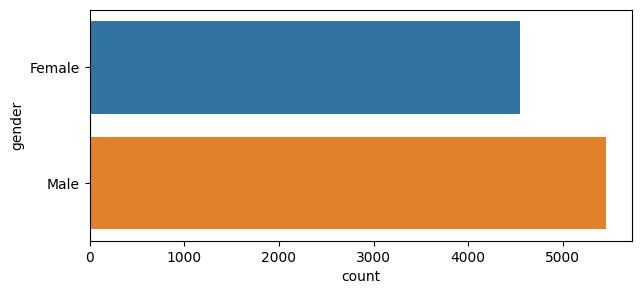

In [ ]:
plt.figure(figsize=(7,3))
sns.countplot(y='gender',data=df)
plt.show()    #number of male customer are greater than female

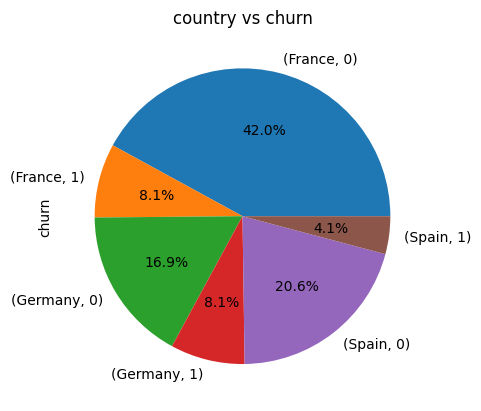

In [ ]:
df.groupby('country').churn.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('country vs churn')
plt.show()
#according to country customers churned out more in germany;customers retained more in france and spain

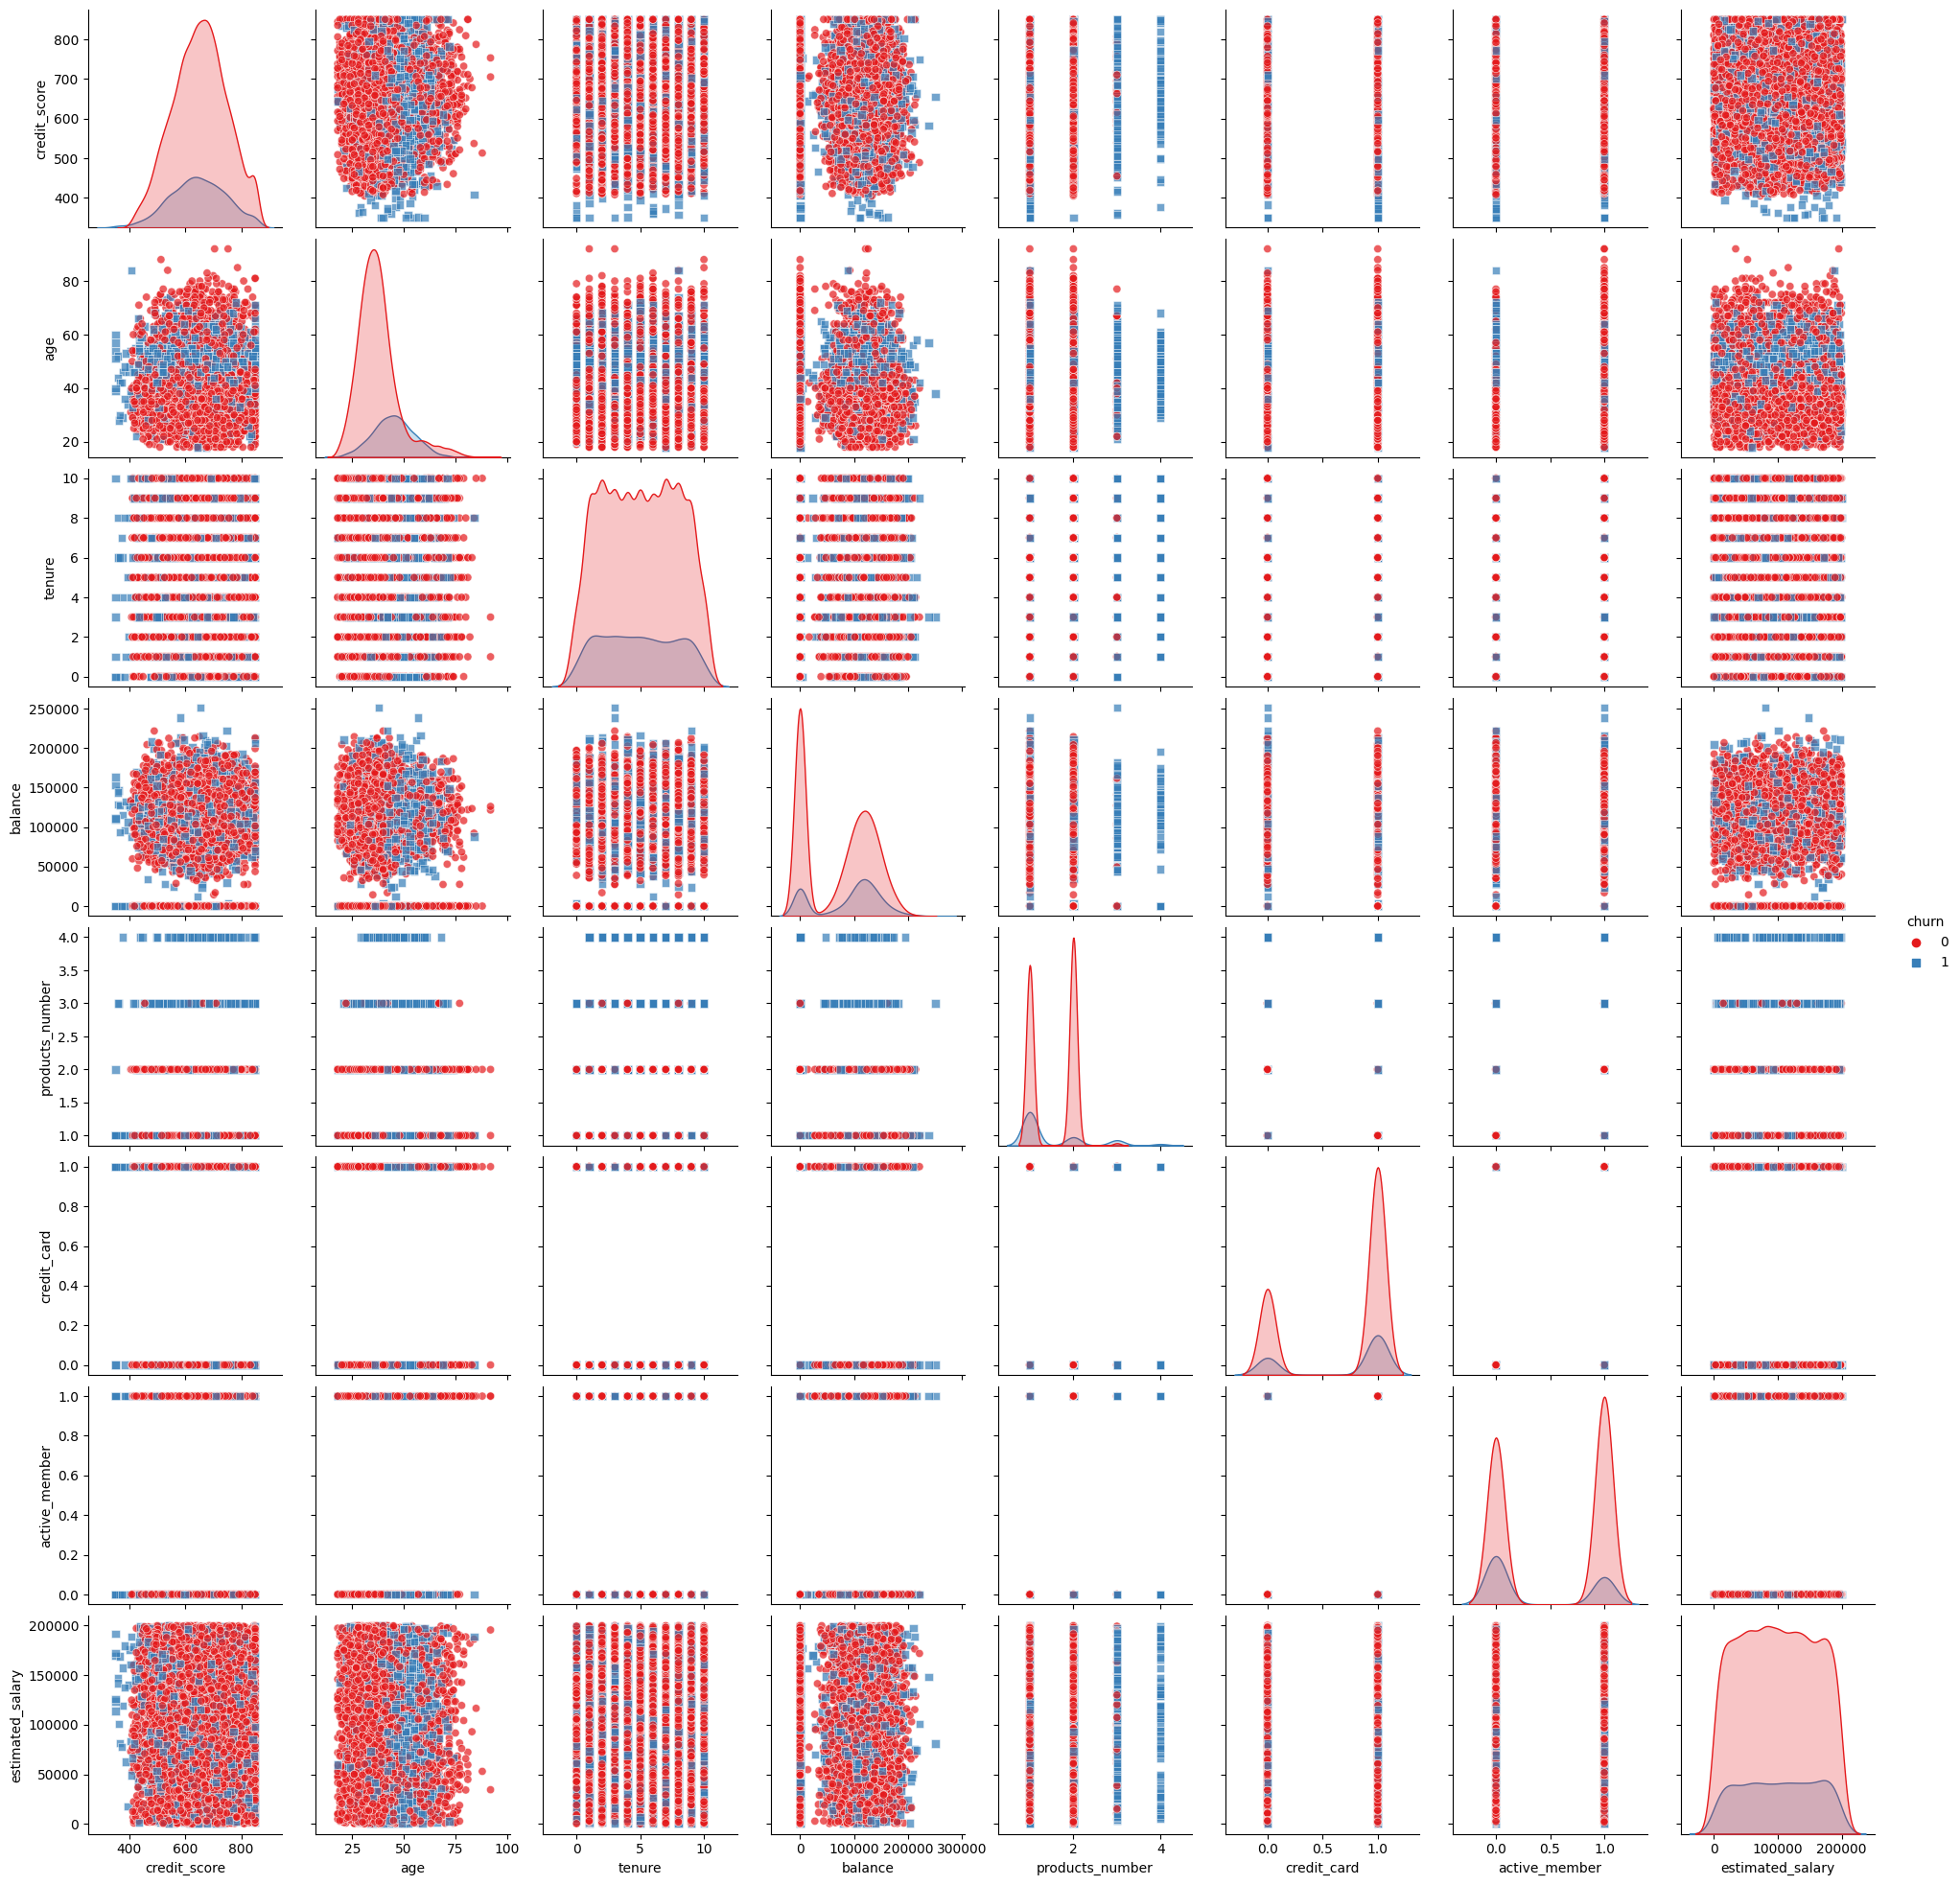

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df,markers=['o','s'],hue='churn',diag_kind='kde',palette='Set1',
             plot_kws={'alpha': 0.7})
plt.show()
#red=0;blue=1;

In [ ]:
import plotly.express as px

fig = px.scatter(df, y='products_number', x='tenure',color='churn')

fig.show()#customers with multiple products in bank churned out

MACHINE LEARNING MODELLING

In [ ]:
x = df.iloc[:,0:-1]
y=df['churn']


In [ ]:
x_obj_col = x.select_dtypes(include='O').columns
x_obj_col

Index(['country', 'gender'], dtype='object')

In [ ]:
# Feature engineering
# handle cantegorical features
from sklearn.preprocessing import LabelEncoder

x[x_obj_col] = x[x_obj_col].apply(LabelEncoder().fit_transform)
x.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [ ]:
x.dtypes

credit_score          int64
country               int64
gender                int64
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
dtype: object

In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)
x = imputer.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=42)

In [ ]:
# feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

models = [LogisticRegression(), GaussianNB(), DecisionTreeClassifier(), RandomForestClassifier(), KNeighborsClassifier()]

RandomForest model gives best accuracy score among all other ml models

In [ ]:
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2003
           1       0.77      0.45      0.57       497

    accuracy                           0.87      2500
   macro avg       0.83      0.71      0.75      2500
weighted avg       0.86      0.87      0.85      2500



In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1937,   66],
       [ 271,  226]])

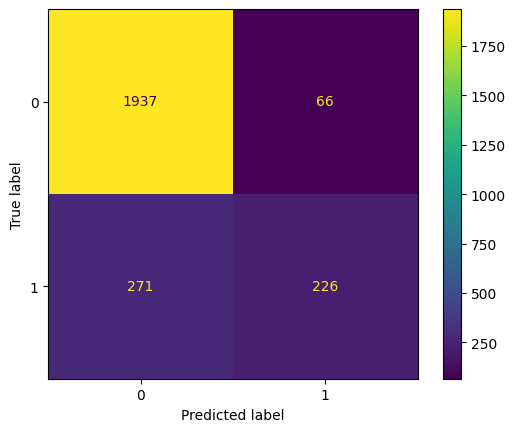

In [ ]:
ConfusionMatrixDisplay(cm, display_labels=clf.classes_).plot()

In [ ]:
for model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model} :- \t Accuracy = {accuracy:.2f}")

LogisticRegression() :- 	 Accuracy = 0.81
GaussianNB() :- 	 Accuracy = 0.83
DecisionTreeClassifier() :- 	 Accuracy = 0.79
RandomForestClassifier() :- 	 Accuracy = 0.87
KNeighborsClassifier() :- 	 Accuracy = 0.83


RANDOM FOREST GIVES THE BEST ACCURACY OF 87%